
### Developing an Artificial Neural Network model to predict the car purchase amont based on various features


#### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Dataset

In [2]:
car_data = pd.read_csv("Car_Purchasing_Data.csv")

In [3]:
car_data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


#### Data Visualization

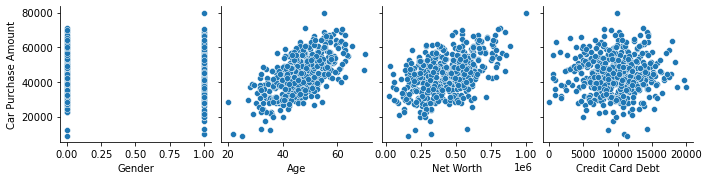

In [4]:
sns.pairplot(car_data ,x_vars =['Gender','Age','Net Worth','Credit Card Debt'], y_vars = 'Car Purchase Amount')

#### Data Cleaning

In [5]:
car_data = car_data.drop(['Customer Name', 'Customer e-mail','Country'],axis = 1,)

In [6]:
X = car_data.drop(['Car Purchase Amount'],axis=1)
y = car_data['Car Purchase Amount']

In [13]:
# Normalising Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1,1))

#### Model Development

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.85, test_size=0.15, random_state=42)

In [40]:
from tensorflow.keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(25,input_dim = 5,activation = 'relu'))
model.add(Dense(25,activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_7 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer = 'adam' , loss='mean_squared_error')

In [42]:
history = model.fit(X_train, y_train, epochs=100 , batch_size = 50 , verbose=1  , validation_split= 0.2)

Epoch 1/100
7/7 [==============================] - 0s 13ms/step - loss: 0.1628 - val_loss: 0.0677
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0637 - val_loss: 0.0335
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0325
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0290 - val_loss: 0.0219
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0176 - val_loss: 0.0111
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0109 - val_loss: 0.0081
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0075
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0071
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0069 - val_loss: 0.0066
Epoch 11/100
7/7 [==========

7/7 [==============================] - 0s 2ms/step - loss: 1.4399e-04 - val_loss: 2.2161e-04
Epoch 82/100
7/7 [==============================] - 0s 3ms/step - loss: 1.3708e-04 - val_loss: 2.1371e-04
Epoch 83/100
7/7 [==============================] - 0s 3ms/step - loss: 1.2799e-04 - val_loss: 2.0861e-04
Epoch 84/100
7/7 [==============================] - 0s 3ms/step - loss: 1.2345e-04 - val_loss: 2.0438e-04
Epoch 85/100
7/7 [==============================] - 0s 4ms/step - loss: 1.1904e-04 - val_loss: 2.0022e-04
Epoch 86/100
7/7 [==============================] - 0s 3ms/step - loss: 1.1445e-04 - val_loss: 1.9430e-04
Epoch 87/100
7/7 [==============================] - 0s 3ms/step - loss: 1.1189e-04 - val_loss: 1.9525e-04
Epoch 88/100
7/7 [==============================] - 0s 3ms/step - loss: 1.0915e-04 - val_loss: 1.8670e-04
Epoch 89/100
7/7 [==============================] - 0s 3ms/step - loss: 1.0373e-04 - val_loss: 1.8160e-04
Epoch 90/100
7/7 [==============================] - 0s 3ms/

#### Model Evaluation

In [43]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

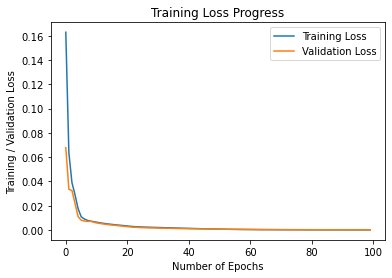

In [49]:
plt.title('Training Loss Progress')
plt.ylabel('Training / Validation Loss')
plt.xlabel('Number of Epochs')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])

In [63]:
# Testing  Random Input : 'Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth'
test = np.array([[0,18,70000,20000,100000]])
test_amount=model.predict(test)
test_amount

array([[47048.4]], dtype=float32)